In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from numpy.linalg import matrix_rank
%matplotlib inline

//anaconda/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note tha

In [2]:
train = pd.read_csv('./../data/training.csv')
label = pd.read_csv('./../data/labels.csv', header=None)
train.drop('Unnamed: 0', axis=1, inplace=True)
# label encode type 
le = LabelEncoder()
train['type_enc'] = le.fit_transform(train['type'])
label.columns = ['0', 'p_label2']
label.drop('0', axis=1, inplace=True)
y_label = np.ravel(label)

In [3]:
train.drop(['type', 
            'mv', 
            'blockTime', 
            'difficulty', 
            'gasLimit_b', 
            'gasUsed_b',
            'reward',
            'size',
            'totalFee',
            'gasShare',
            'gweiPaid',
            'gweiPaid_b',
            'gweiShare',
            'txcnt_second'], axis=1, inplace=True)

## Subset of features

In [4]:
train.columns

Index([u'gasLimit_t', u'gasUsed_t', u'newContract', u'amount_gwei', u'free_t',
       u'day', u'hour', u'dayofweek', u'avg_blocktime_6', u'avg_gasUsed_b_6',
       u'avg_tx_count_6', u'avg_uncle_count_6', u'avg_difficulty_6',
       u'avg_txcnt_second_6', u'avg_gasUsed_t_6', u'avg_price_6',
       u'avg_blocktime_60', u'avg_gasUsed_b_60', u'avg_tx_count_60',
       u'avg_uncle_count_60', u'avg_difficulty_60', u'avg_txcnt_second_60',
       u'avg_gasUsed_t_60', u'avg_price_60', u'type_enc'],
      dtype='object')

In [5]:
sub_cols = [
           'avg_blocktime_6',
           'avg_blocktime_60',
            'gasUsed_t',
    'avg_gasUsed_b_6',
    'avg_gasUsed_t_6',
    'avg_tx_count_6',
    'avg_uncle_count_6',
    'avg_difficulty_6',
    'avg_txcnt_second_6',
    'avg_blocktime_60',
    'avg_tx_count_60',
    'avg_uncle_count_60',
    'avg_difficulty_60',
    'avg_txcnt_second_60',
    'avg_gasUsed_t_60'
         ]

In [6]:
sub_train = train[sub_cols]

## Train test split

In [7]:
X = sub_train.values
y = y_label
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
matrix_rank(X), len(sub_cols)

(3, 15)

## Linear regression

In [15]:
def linear_regression(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores = cross_val_score(lr, X, y, scoring='r2', cv=3)
    print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
    print('R2_score: {}'.format(r2_score(y_test, y_pred)))
    print('avg_CV_score: {}'.format(np.mean(scores)))
    plt.scatter(y_test, y_pred)
    return lr

MSE: 868.175005805
R2_score: 0.0670993034619
avg_CV_score: -8.58833729575


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

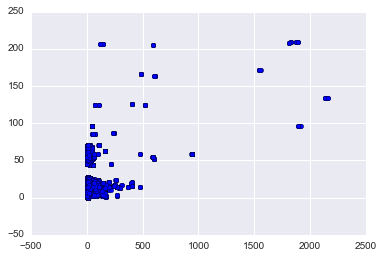

In [16]:
linear_regression(X_train, X_test, y_train, y_test)

In [11]:
# get summary statistics from statsmodels
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                 1.174e+04
Date:                Wed, 04 Oct 2017   Prob (F-statistic):               0.00
Time:                        00:59:25   Log-Likelihood:            -5.0691e+06
No. Observations:             1047469   AIC:                         1.014e+07
Df Residuals:                 1047461   BIC:                         1.014e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1751      0.004     47.259      0.000       0.168       0.182
x2            -0.4256      0.004    -96.551      0.000      -0.434      -0.417
x3         -6.341e-07   1.99e-07     -3.187      0.001   -1.02e-06   -2.44e-07
x4          3.911e-07   3.43e-08     11.397      0.000    3.24e-07    4.58e-07
x5          3.037e-06   6.78e-07      4.476      0.000    1.71e-06    4.37e-06
x6            -0.0121      0.001     -8.523      0.000      -0.015      -0.009
x7         -2.294e-05   1.98e-06    -11.591      0.000   -2.68e-05   -1.91e-05
x8          1.104e-14   4.28e-17    257.806      0.000     1.1e-14    1.11e-14
x9            -0.1209      0.005    -23.824      0.000      -0.131      -0.111
x10           -0.4433      0.005    -96.840      0.000      -0.452      -0.434
x11            0.1150      0.002     71.998      0.000       0.112       0.118
x12            0.0002   1.95e-06     88.583      0.000       0.000       0.000
x13        -4.314e-15   8.56e-17    -50.398      0.000   -4.48e-15   -4.15e-15
x14            0.1179      0.001     80.176      0.000       0.115       0.121
x15         7.573e-05   1.59e-06     47.626      0.000    7.26e-05    7.88e-05
==============================================================================
Omnibus:                  2871297.408   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     142742364310.187
Skew:                          34.570   Prob(JB):                         0.00
Kurtosis:                    1810.149   Cond. No.                     1.32e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+22. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Cross validation

In [20]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the feature data and transform
X_std = sc.fit_transform(X)

In [18]:
# Create a list of 10 candidate values for the C parameter
#max_depth_candidates = dict(max_depth=np.arange(1, 7, 1))

# Create a gridsearch object with the decision tree regressor and the max_depth value candidates
#reg = GridSearchCV(estimator=tree.DecisionTreeRegressor(), param_grid=max_depth_candidates)

In [19]:
print('Mean CV r2_score: {}'.format(np.mean(cross_val_score(LinearRegression(), X_std, y, scoring='r2', cv=3))))

ValueError: Found input variables with inconsistent numbers of samples: [1047469, 1396626]